Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
O = PolynomialFeatures(1).fit_transform(X)
print ("Matrica dizajna je oblika:")
print (O)

Matrica dizajna je oblika:
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
pom = matmul( inv(matmul(transpose(O), O)), transpose(O))
w2 = matmul(pom, y)
print (w2)
w = matmul(pinv(O), y)
print (w)

print("Linearni model w je oblika: " + str(round(w[1], 4)) + "x" + " + " + str(round(w[0], 4)))

[2.2        0.45714286]
[2.2        0.45714286]
Linearni model w je oblika: 0.4571x + 2.2


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Stvarna vrijednost y: [4 1 2 5]
Predpostavljena vrijednost y: [2.2    2.6571 3.1143 4.0286]
Pogreška učenja E iznosi: 2.0429
Funkcija srednje kvadratne pogreške E iznosi:  4.0857


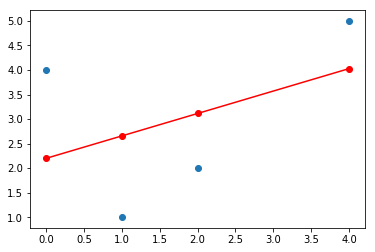

In [7]:
y2 = np.array([])
for x in O:
    h = matmul(transpose(w), x)
    y2 = append(y2, h)

print ("Stvarna vrijednost y: ", end="")
print (y)
print ("Predpostavljena vrijednost y: ", end="")
print (around(y2, decimals=4))

E = sklearn.metrics.mean_squared_error(y, y2)
print("Pogreška učenja E iznosi: " + str(round(E, 4)))

E2=0
for i in range(len(y)):
    E2 = E2 + (y[i]-y2[i])**2
E2 = E2/2
print("Funkcija srednje kvadratne pogreške E iznosi: ", str(round(E2, 4)))

plt.scatter(X, y)
plt.plot(X, y2, "r")
plt.plot(X, y2, "ro")
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
try:
    w_err = matmul(inv(O), y)
except LinAlgError as e:
    print ("Greška: " + str(e))

Greška: Last 2 dimensions of the array must be square


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)
print ("Prije izračunati w0: " + str(around(w[0], decimals=4)))
print ("LinearRegression w0: " + str(around(reg.intercept_, decimals=4)) + "\n")

print ("Prije izračunati w1: " + str(around(w[1], decimals=4)))
print ("LinearRegression w1: " + str(around(reg.coef_[0], decimals=4)) + "\n")

y3 = reg.predict(X)
print ("Prije izračunata predpostavljena vrijednost y: " + str(around(y2, decimals=4)))
print ("LinearRegression predpostavljena vrijednost y: " + str(around(y3, decimals=4)) + "\n")

E3 = sklearn.metrics.mean_squared_error(y, y3)
print("Prije izračunata pogreška učenja E iznosi: " + str(round(E, 4)))
print("LinearRegression pogreška učenja E iznosi: " + str(round(E3, 4)))

Prije izračunati w0: 2.2
LinearRegression w0: 2.2

Prije izračunati w1: 0.4571
LinearRegression w1: 0.4571

Prije izračunata predpostavljena vrijednost y: [2.2    2.6571 3.1143 4.0286]
LinearRegression predpostavljena vrijednost y: [2.2    2.6571 3.1143 4.0286]

Prije izračunata pogreška učenja E iznosi: 2.0429
LinearRegression pogreška učenja E iznosi: 2.0429


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    y = np.array([])
    for x in X:
        yi = f(x)+ normal(0, noise)
        y = append(y, yi)
    return y

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

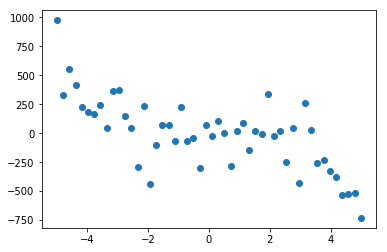

In [13]:
def f(x):
    return (5 + x - 2*pow(x,2) - 5*pow(x,3))

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

plt.scatter(X, y)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Model w je oblika: -6.9166x^3 + 0.7644x^2 + 34.3558x + -12.4375
Pogreška učenja E iznosi: 29694.278


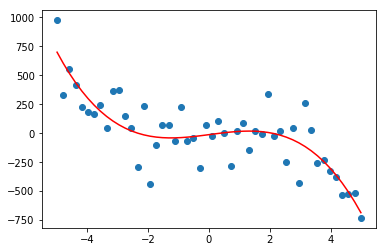

In [14]:
O = PolynomialFeatures(3).fit_transform(X)
w = matmul(pinv(O), y)
print("Model w je oblika: " + str(round(w[3], 4)) + "x^3 + " + str(round(w[2], 4)) + "x^2 + " + str(round(w[1], 4)) + "x + " + str(round(w[0], 4)))

y2 = np.array([])
for x in O:
    h = matmul(transpose(w), x)
    y2 = append(y2, h)
    
E = sklearn.metrics.mean_squared_error(y, y2)
print("Pogreška učenja E iznosi: " + str(round(E, 4)))

plt.scatter(X, y)
plt.plot(X, y2, "r")
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška učenja E za stupanj polinoma 1 iznosi: 48909.0745
Pogreška učenja E za stupanj polinoma 3 iznosi: 29694.278
Pogreška učenja E za stupanj polinoma 5 iznosi: 29394.9179
Pogreška učenja E za stupanj polinoma 10 iznosi: 26889.5987
Pogreška učenja E za stupanj polinoma 20 iznosi: 18755.2354


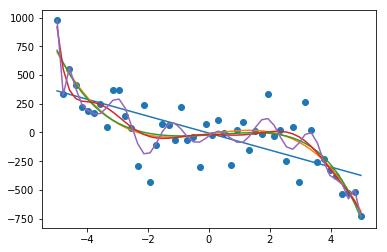

In [15]:
plt.scatter(X, y)
for d in [1, 3, 5, 10, 20]:
    O = PolynomialFeatures(d).fit_transform(X)
    w = matmul(pinv(O), y)
    y2 = np.array([])
    for x in O:
        h = matmul(transpose(w), x)
        y2 = append(y2, h)
    E = sklearn.metrics.mean_squared_error(y, y2)
    plt.plot(X, y2)
    print("Pogreška učenja E za stupanj polinoma "+ str(d) +" iznosi: " + str(round(E, 4)))
    
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

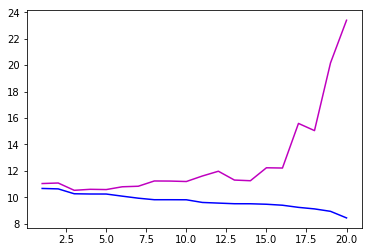

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

pogreska_ucenja = np.array([])
ispitna_pogreska = np.array([])
for d in range(1, 21):
    poly = PolynomialFeatures(d)
    O_train = poly.fit_transform(X_train)
    O_test = poly.fit_transform(X_test)
    
    regresion = LinearRegression().fit(O_train, y_train)
    y2_train = regresion.predict(O_train)
    y2_test = regresion.predict(O_test)
    
    E_train = sklearn.metrics.mean_squared_error(y_train, y2_train)
    E_test = sklearn.metrics.mean_squared_error(y_test, y2_test)
    pogreska_ucenja = np.append(pogreska_ucenja, log(E_train))
    ispitna_pogreska = np.append(ispitna_pogreska, log(E_test))

plt.plot(range(1, 21), ispitna_pogreska, 'm')
plt.plot(range(1, 21), pogreska_ucenja, 'b')
plt.show()



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

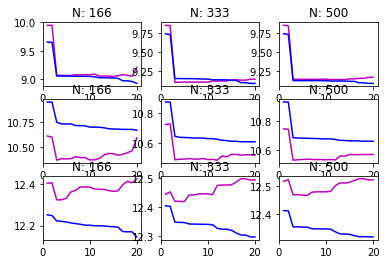

In [18]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

y_train_100 = make_labels(X_train, f, noise=100)
y_train_200 = make_labels(X_train, f, noise=200)
y_train_500 = make_labels(X_train, f, noise=500)
y_train = [y_train_100, y_train_200, y_train_500]

y_test_100 = make_labels(X_test, f, noise=100)
y_test_200 = make_labels(X_test, f, noise=200)
y_test_500 = make_labels(X_test, f, noise=500)
y_test = [y_test_100, y_test_200, y_test_500]

fig, axs = plt.subplots(3, 3)

for i in range(0, 3):
    for j in range(0, 3):
        N = (500 * (j+1))//3
        pogreska_ucenja = np.array([])
        ispitna_pogreska = np.array([])
        for d in range(1, 21):
            poly = PolynomialFeatures(d)
            O_train = poly.fit_transform(X_train[0:N])
            O_test = poly.fit_transform(X_test[0:N])
            
            regresion = LinearRegression().fit(O_train, y_train[i][0:N])
            y2_train = regresion.predict(O_train)
            y2_test = regresion.predict(O_test)
            
            E_train = sklearn.metrics.mean_squared_error(y_train[i][0:N], y2_train)
            E_test = sklearn.metrics.mean_squared_error(y_test[i][0:N], y2_test)
            pogreska_ucenja = np.append(pogreska_ucenja, log(E_train))
            ispitna_pogreska = np.append(ispitna_pogreska, log(E_test))
            
        axs[i, j].plot(range(1, 21), ispitna_pogreska, 'm')
        axs[i, j].plot(range(1, 21), pogreska_ucenja, 'b')
        axs[i, j].set_title("N: " + str(N))

plt.show()        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
O = PolynomialFeatures(3).fit_transform(X)

I = identity(4)
I[0][0] = 0
for lambd in [0, 1, 10]:
    pom = matmul( inv( add(matmul(transpose(O), O), lambd * I)), transpose(O))
    w = matmul(pom, y)
    print("Model w je za lambda " + str(lambd) + " oblika: " + str(round(w[3], 4)) + "x^3 + " + str(round(w[2], 4)) + "x^2 + " + str(round(w[1], 4)) + "x + " + str(round(w[0], 4)))
    

Model w je za lambda 0 oblika: -0.4583x^3 + 3.375x^2 + -5.9167x + 4.0
Model w je za lambda 1 oblika: 0.1446x^3 + -0.2832x^2 + -0.6908x + 3.057
Model w je za lambda 10 oblika: 0.0816x^3 + -0.1342x^2 + -0.159x + 2.4944


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
for lambd in [0, 1, 10]:
    clf = Ridge(alpha=lambd).fit(O, y)
    w = [clf.intercept_, *clf.coef_[1:]]
    print("Model w je za lambda=" + str(lambd) + " oblika: " + str(round(w[3], 4)) + "x^3 + " + str(round(w[2], 4)) + "x^2 + " + str(round(w[1], 4)) + "x + " + str(round(w[0], 4)))


Model w je za lambda=0 oblika: -0.4583x^3 + 3.375x^2 + -5.9167x + 4.0
Model w je za lambda=1 oblika: 0.1446x^3 + -0.2832x^2 + -0.6908x + 3.057
Model w je za lambda=10 oblika: 0.0816x^3 + -0.1342x^2 + -0.159x + 2.4944


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

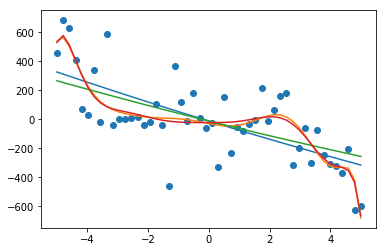

In [22]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)

plt.scatter(X, y)
for lambd in [0, 100]:
    for d in [2, 10]:
        O = PolynomialFeatures(d).fit_transform(X)
        regresion = Ridge(alpha=lambd).fit(O, y)
        y2 = regresion.predict(O)
        
        plt.plot(X, y2)

plt.show()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


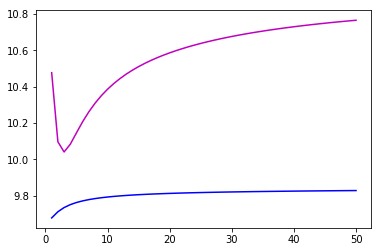

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(10)

O_train = poly.fit_transform(X_train)
O_test = poly.fit_transform(X_test)
pogreska_ucenja = np.array([])
ispitna_pogreska = np.array([])
for lambd in range(1, 51):
    
    regresion = Ridge(alpha=lambd).fit(O_train, y_train)
    y2_train = regresion.predict(O_train)
    y2_test = regresion.predict(O_test)
    
    E_train = sklearn.metrics.mean_squared_error(y_train, y2_train)
    E_test = sklearn.metrics.mean_squared_error(y_test, y2_test)
    pogreska_ucenja = np.append(pogreska_ucenja, log(E_train))
    ispitna_pogreska = np.append(ispitna_pogreska, log(E_test))
    
plt.plot(range(1, 51), ispitna_pogreska, 'm')
plt.plot(range(1, 51), pogreska_ucenja, 'b')
plt.show()


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

def norma_L1(vector):
    suma = 0
    for w in vector:
        suma += abs(w)
    return suma
    
def norma_L2(vector):
    suma = 0
    for w in vector:
        suma += (w*w)
    return math.sqrt(suma)

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Postotak težina modela jednakih nula: 9.09%


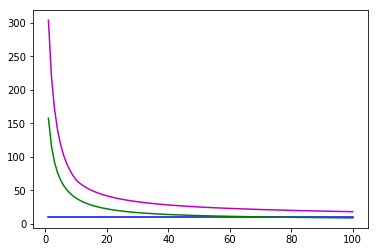

In [25]:
X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

L0=[]; L1=[]; L2=[]

O = PolynomialFeatures(10).fit_transform(X_train)
for lambd in range(1, 101):
    regresion = Ridge(alpha=lambd).fit(O, y_train)
    w = regresion.coef_
    L0.append(nonzeroes(w))
    L1.append(norma_L1(w))
    L2.append(norma_L2(w))
    
    if (lambd == 100):
        percentage = (1-nonzeroes(w)/len(w))*100
        print ("Postotak težina modela jednakih nula: " + str(round(percentage, 2)) + "%")
    
plt.plot(range(1, 101), L0, "b")
plt.plot(range(1, 101), L1, "m")
plt.plot(range(1, 101), L2, "g")
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

Postotak težina modela jednakih nula: 27.27%


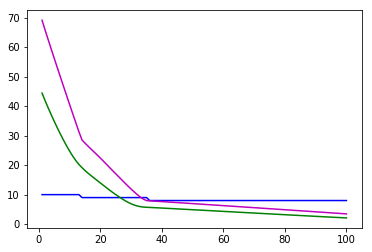

In [26]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

L0=[]; L1=[]; L2=[]
for lambd in range(1, 101):
    clf = Lasso(alpha=lambd).fit(O, y_train)
    w = clf.coef_
    L0.append(nonzeroes(w))
    L1.append(norma_L1(w))
    L2.append(norma_L2(w))
    
    if (lambd == 100):
        percentage = (1-nonzeroes(w)/len(w))*100
        print ("Postotak težina modela jednakih nula: " + str(round(percentage, 2)) + "%")

    
plt.plot(range(1, 101), L0, "b")
plt.plot(range(1, 101), L1, "m")
plt.plot(range(1, 101), L2, "g")
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

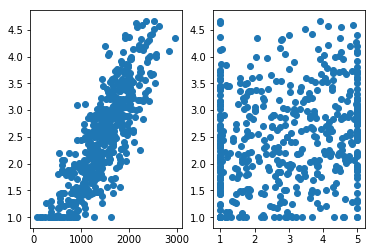

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(exam_score, grades_y)
ax2.scatter(grade_in_highschool, grades_y)
plt.show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [29]:
clf = Ridge(alpha=0.01).fit(grades_X, grades_y)
w = [clf.intercept_, *clf.coef_]
print("Model w je za lambda=0.01 oblika: " + str(round(w[2], 4)) + "grade + " + str(round(w[1], 4)) + "exam + " + str(round(w[0], 4)))


Model w je za lambda=0.01 oblika: 0.0948grade + 0.0014exam + 0.1506


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)

pom = grades_y.reshape(-1, 1)
grades_y_fixed = scaler.fit_transform(pom).flatten()

clf = Ridge(alpha=0.01).fit(grades_X_fixed, grades_y_fixed)
w=[clf.intercept_, *clf.coef_]
print("Model w je za lambda=0.01 oblika: " + str(round(w[2], 4)) + "grade + " + str(round(w[1], 4)) + "exam + " + str(round(w[0], 4)))


Model w je za lambda=0.01 oblika: 0.1517grade + 0.8163exam + 0.0


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
part1 = grades_X_fixed[:,0]
part2 = grades_X_fixed[:,1]
grades_X_fixed_colinear = column_stack((part1, part2, part2))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
clf = Ridge(alpha=0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
print(clf.intercept_, clf.coef_)

8.070315790923504e-17 [0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
w1_001 = []; w2_001 = []; w3_001 = []
w1_1000 = []; w2_1000 = []; w3_1000 = []

for i in range(1,11):
    X1, X2, y1, y2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    
    clf = Ridge(alpha=0.01).fit(X1, y1)
    w1_001.append(clf.coef_[0])
    w2_001.append(clf.coef_[1])
    w3_001.append(clf.coef_[2])
    print("Za lambda 0.01: ",clf.intercept_, clf.coef_)

    clf = Ridge(alpha=1000).fit(X2, y2)
    w1_1000.append(clf.coef_[0])
    w2_1000.append(clf.coef_[1])
    w3_1000.append(clf.coef_[2])
    print("Za lambda 1000: ",clf.intercept_, clf.coef_)
    print("")
    
print("Standardna devijacija za težinu w1 uz lamdba=0.01: " + str(round(std(w1_001), 4)))
print("Standardna devijacija za težinu w2 uz lamdba=0.01: " + str(round(std(w2_001), 4)))
print("Standardna devijacija za težinu w3 uz lamdba=0.01: " + str(round(std(w3_001), 4)))
print("Standardna devijacija za težinu w1 uz lamdba=1000: " + str(round(std(w1_1000), 4)))
print("Standardna devijacija za težinu w2 uz lamdba=1000: " + str(round(std(w2_1000), 4)))
print("Standardna devijacija za težinu w3 uz lamdba=1000: " + str(round(std(w3_1000), 4)))

Za lambda 0.01:  -0.010456622883903425 [0.79385128 0.06504303 0.06504303]
Za lambda 1000:  0.024081011489321225 [0.16419725 0.02816756 0.02816756]

Za lambda 0.01:  0.021520616610354565 [0.80739011 0.0761075  0.0761075 ]
Za lambda 1000:  -0.03106416124115064 [0.16837778 0.04200572 0.04200572]

Za lambda 0.01:  0.009214473298725726 [0.814158   0.07673386 0.07673386]
Za lambda 1000:  0.02709742754435205 [0.16675609 0.03992155 0.03992155]

Za lambda 0.01:  -0.01820558857822946 [0.83265053 0.07483515 0.07483515]
Za lambda 1000:  0.049836906314681975 [0.16232085 0.03253696 0.03253696]

Za lambda 0.01:  0.012619389342067765 [0.79735626 0.08013669 0.08013669]
Za lambda 1000:  0.02386182139756894 [0.17099764 0.03987356 0.03987356]

Za lambda 0.01:  0.0028310917700996655 [0.81845427 0.04525193 0.04525193]
Za lambda 1000:  -0.017830933728238522 [0.15003014 0.03454006 0.03454006]

Za lambda 0.01:  -0.04553636019558212 [0.80086373 0.0614553  0.0614553 ]
Za lambda 1000:  0.05176755035496286 [0.1726

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
I = identity(3)
I[0][0] = 0
for lambd in [0.01, 10]:
    m = matmul( transpose(grades_X_fixed_colinear), grades_X_fixed_colinear) + lambd*I
    
    print("Kondicijski broj matrice za lambda=" + str(lambd) + " iznosi "+ str(round(linalg.cond(m), 4)))

Kondicijski broj matrice za lambda=0.01 iznosi 100542.8559
Kondicijski broj matrice za lambda=10 iznosi 101.5315


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  